In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [3]:
col = ['duration','protocol_type', 
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login', 
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'target']

In [4]:
info = pd.read_csv('../input/kdd.txt',names = col)

In [5]:
# Dividing the attack types into 4 categories
# take label column
labeldf=info['target']
# change the label column
newlabeldf={ 'normal.' : 0, 'neptune.' : 1 ,'back.': 1, 'land.': 1, 'pod.': 1, 'smurf.': 1, 'teardrop.': 1,'mailbomb.': 1, 'apache2.': 1, 'processtable.': 1, 'udpstorm.': 1, 'worm.': 1,
                           'ipsweep.' : 2,'nmap.' : 2,'portsweep.' : 2,'satan.' : 2,'mscan.' : 2,'saint.' : 2
                           ,'ftp_write.': 3,'guess_passwd.': 3,'imap.': 3,'multihop.': 3,'phf.': 3,'spy.': 3,'warezclient.': 3,'warezmaster.': 3,'sendmail.': 3,'named.': 3,'snmpgetattack.': 3,'snmpguess.': 3,'xlock.': 3,'xsnoop.': 3,'httptunnel.': 3,
                           'buffer_overflow.': 4,'loadmodule.': 4,'perl.': 4,'rootkit.': 4,'ps.': 4,'sqlattack.': 4,'xterm.': 4}

info['target']=info['target'].apply(lambda x:newlabeldf[x])

print(info['target'].head())

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [6]:
info.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [7]:
info['target'].unique()

array([0, 4, 1, 3, 2])

In [8]:
info['service'].unique()

array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
       'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
       'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh',
       'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf',
       'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer',
       'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard',
       'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2',
       'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm',
       'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i',
       'X11', 'urp_i', 'pm_dump'], dtype=object)

In [9]:
info['flag'].unique()

array(['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0',
       'OTH', 'SH'], dtype=object)

In [10]:
info['target'].value_counts()

1    63333
0    60720
2     1809
3      102
4        9
Name: target, dtype: int64

In [11]:
info.shape

(125973, 42)

In [12]:
info.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
X = info.iloc[:,:41].values

In [14]:
print(X)

[[0 'tcp' 'http' ... 0.0 0.0 0.0]
 [0 'tcp' 'http' ... 0.0 0.0 0.0]
 [0 'tcp' 'http' ... 0.0 0.0 0.0]
 ...
 [0 'tcp' 'private' ... 1.0 0.0 0.0]
 [0 'tcp' 'private' ... 1.0 0.0 0.0]
 [0 'tcp' 'private' ... 1.0 0.0 0.0]]


In [15]:
Y=  info.iloc[:,41].values

In [16]:
print(Y)

[0 0 0 ... 1 1 1]


In [17]:
#labelencoder used to convert objects to numerical values
# 1st, 2nd, 3rd and target colums 42nd
labelencoder_X = LabelEncoder()
X[:,1] = labelencoder_X.fit_transform(X[:,1])
X[:,2] = labelencoder_X.fit_transform(X[:,2])
X[:,3] = labelencoder_X.fit_transform(X[:,3])

In [18]:
print(X)

[[0 1 22 ... 0.0 0.0 0.0]
 [0 1 22 ... 0.0 0.0 0.0]
 [0 1 22 ... 0.0 0.0 0.0]
 ...
 [0 1 45 ... 1.0 0.0 0.0]
 [0 1 45 ... 1.0 0.0 0.0]
 [0 1 45 ... 1.0 0.0 0.0]]


In [19]:
one=OneHotEncoder(categorical_features=[1,2,3])

In [20]:
X = one.fit_transform(X).toarray()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [21]:
from sklearn import model_selection
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
# Applying Bagging
X_train, X_test, Y_train, Y_test =  tts(X, Y, random_state = 0, test_size = 0.3)
seed = 7
num_trees = 100
cart = DecisionTreeClassifier()
bagc = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
bagc.fit(X_train,Y_train)
y_pred_bag = bagc.predict(X_test)
print("Bagging accuracy_score:",accuracy_score(Y_test, y_pred_bag))
print("Bagging precision_score:",precision_score(Y_test, y_pred_bag, average='weighted'))
print("Bagging recall_score:",recall_score(Y_test, y_pred_bag, average='weighted'))
print("Bagging f1_score:",f1_score(Y_test, y_pred_bag, average='weighted'))

Bagging accuracy_score: 0.9994707874682472
Bagging precision_score: 0.9994704289633538
Bagging recall_score: 0.9994707874682472
Bagging f1_score: 0.999458324773544


In [23]:
# Applying AdaBoosting
seed = 3
num_trees = 40
ada = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
ada.fit(X_train, Y_train)
y_pred_ada = ada.predict(X_test)
print("Adaboost accuracy_score:",accuracy_score(Y_test, y_pred_ada))
print("Adaboost precision_score:",precision_score(Y_test, y_pred_ada, average='weighted'))
print("Adaboost recall_score:",recall_score(Y_test, y_pred_ada, average='weighted'))
print("Adaboost f1_score:",f1_score(Y_test, y_pred_ada, average='weighted'))

Adaboost accuracy_score: 0.9654953429297206
Adaboost precision_score: 0.9521829891104469
Adaboost recall_score: 0.9654953429297206
Adaboost f1_score: 0.9583659382282681


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
#Applying Stochastic Gradient Boosting
seed = 7
num_trees = 36
sgb = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
sgb.fit(X_train, Y_train)
y_pred_sgb = sgb.predict(X_test)
print("Gradient Boosting accuracy_score:",accuracy_score(Y_test, y_pred_sgb))
print("Gradient Boosting precision_score:",precision_score(Y_test, y_pred_sgb, average='weighted'))
print("Gradient Boosting recall_score:",recall_score(Y_test, y_pred_sgb, average='weighted'))
print("Gradient Boosting f1_score:",f1_score(Y_test, y_pred_sgb, average='weighted'))

Gradient Boosting accuracy_score: 0.9989151143099069
Gradient Boosting precision_score: 0.9989427616331358
Gradient Boosting recall_score: 0.9989151143099069
Gradient Boosting f1_score: 0.9989230757845409


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [25]:
print ('Confusion matrix for Bagging classifier')
print(multilabel_confusion_matrix(Y_test, y_pred_bag, labels=[0,1,2,3,4]))
#print (confusion_matrix(Y_test, y_pred_bag))
print('\n')

print ('Confusion matrix for AdaBoost Classifier')
print(multilabel_confusion_matrix(Y_test, y_pred_ada, labels=[0,1,2,3,4]))
#print (confusion_matrix(Y_test, y_pred_ada))
print('\n')

print ('Confusion matrix for Stochastic Gradient Boosting Classifier')
print(multilabel_confusion_matrix(Y_test, y_pred_sgb, labels=[0,1,2,3,4]))
#print (confusion_matrix(Y_test, y_pred_sgb))
print('\n')

Confusion matrix for Bagging classifier
[[[19619    15]
  [    4 18154]]

 [[18715     3]
  [    1 19073]]

 [[37261     2]
  [    8   521]]

 [[37761     0]
  [    7    24]]

 [[37792     0]
  [    0     0]]]


Confusion matrix for AdaBoost Classifier
[[[18519  1115]
  [   44 18114]]

 [[18529   189]
  [  700 18374]]

 [[37263     0]
  [  529     0]]

 [[37761     0]
  [   31     0]]

 [[37792     0]
  [    0     0]]]


Confusion matrix for Stochastic Gradient Boosting Classifier
[[[19601    33]
  [    8 18150]]

 [[18716     2]
  [    7 19067]]

 [[37263     0]
  [   21   508]]

 [[37756     5]
  [    5    26]]

 [[37791     1]
  [    0     0]]]




In [26]:
# Comparing Bagging, AdaBoosting and Gradient Boosting approaches Using Graph representation
import matplotlib.pyplot as plt
import seaborn as sns
names = ['Bagging Classifier', 'Adaboost Classifier', 'Gradient Boosting Classifier']
results = [0.9994,0.9654,0.998]

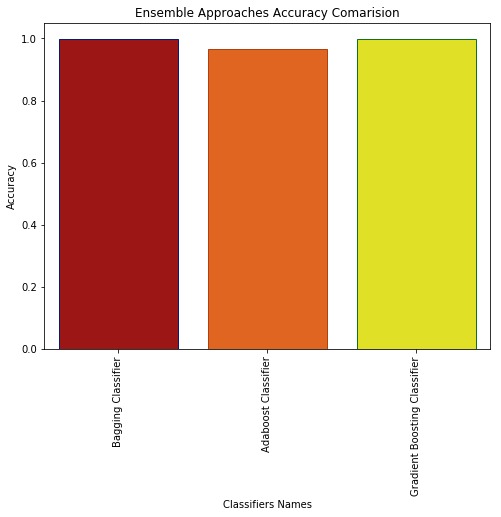

In [27]:
plt.subplots(figsize=(8,6))
sns.barplot(names,results,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Classifiers Names') 
plt.ylabel('Accuracy')
plt.title('Ensemble Approaches Accuracy Comarision')
plt.show()